In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#Generate some data
def generate_data(num_samples):
    np.random.seed(42)  # For reproducibility
    X = np.random.rand(num_samples, 1) * 10 #Features
    y = 3*X + 7 + np.random.randn(num_samples, 1) #Target variable with some noise
    return X, y
     

In [3]:
#Mean squared error function
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [4]:
# Batch/Vanilla Gradient Descent
def batch_gradient_descent(X, y, epochs, learning_rate=0.01):
    m, n = X.shape
    X = np.c_[np.ones((m,1)), X] # Add bias term
    theta = np.random.randn(n+1, 1)
    losses = []
    
    for epoch in range(epochs):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = 2/m * X.T.dot(errors)
        theta = theta - learning_rate*gradients
        loss = compute_loss(y, predictions)
        losses.append(loss)
        
    return theta, losses
        

In [15]:
#Stochastic gradient desecnt
def stochastic_gradient_descent(X, y, epochs, learning_rate = 0.01):
    m ,n = X.shape
    X = np.c_[np.ones((m,1)), X] #Add bias terms
    theta = np.random.randn(n+1, 1)
    losses = []
    
    for epoch in range(epochs):
        epoch_loss = 0
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        predictions = xi.dot(theta)
        errors = predictions - yi
        gradients = 2*xi.T.dot(errors)
        theta -= learning_rate*gradients
        loss = compute_loss(yi, predictions)
        losses.append(loss)
        
    return theta, losses
        

In [16]:
small_dataset_size = 1000
large_dataset_size = 10000000
X_small , y_small = generate_data(small_dataset_size)
X_large, y_large = generate_data(large_dataset_size)

In [17]:
#Run Batch Gradient Descent for small dataset
start_time = time.time()
theta_bgd_small , losses_bgd_small = batch_gradient_descent(X_small, y_small, epochs=50)
time_bgd_small = time.time() - start_time

In [18]:
#Run Batch gradient descent for large dataset
start_time = time.time()
theta_bgd_large, losses_bgd_large = batch_gradient_descent(X_large, y_large, epochs=50)
time_bgd_large = time.time() - start_time

In [19]:
#Run Stochastic gradient descent for small datsets
start_time = time.time()
theta_sgd_small, losses_sgd_small = stochastic_gradient_descent(X_small, y_small, epochs=50)
time_sgd_small = time.time() - start_time

In [20]:
#Run Stochastic gradient descent for large datsets
start_time = time.time()
theta_sgd_large, losses_sgd_large = stochastic_gradient_descent(X_large, y_large, epochs=50)
time_sgd_large = time.time() - start_time

In [11]:
print("Batch Gradient Descent (Small Dataset): Time taken: {:.2f} seconds, Final theta: {}".format(time_bgd_small, theta_bgd_small.ravel()))
print("Batch Gradient Descent (Large Dataset): Time taken: {:.2f} seconds, Final theta: {}".format(time_bgd_large, theta_bgd_large.ravel()))
print("Stochastic Gradient Descent (Small Dataset): Time taken: {:.2f} seconds, Final theta: {}".format(time_sgd_small, theta_sgd_small.ravel()))   
print("Stochastic Gradient Descent (Large Dataset): Time taken: {:.2f} seconds, Final theta: {}".format(time_sgd_large, theta_sgd_large.ravel()))

Batch Gradient Descent (Small Dataset): Time taken: 0.00 seconds, Final theta: [1.5161079 3.8432732]
Batch Gradient Descent (Large Dataset): Time taken: 13.18 seconds, Final theta: [1.88586446 3.77280366]
Stochastic Gradient Descent (Small Dataset): Time taken: 0.01 seconds, Final theta: [3.05273909 3.87652915]
Stochastic Gradient Descent (Large Dataset): Time taken: 0.40 seconds, Final theta: [1.79054138 3.33726647]


In [22]:
print("Batch Gradient Descent (Small Dataset): Time taken: {:.2f} seconds, Final loss: {}".format(time_bgd_small, losses_bgd_small[-1]))
print("Batch Gradient Descent (Large Dataset): Time taken: {:.2f} seconds, Final loss: {}".format(time_bgd_large, losses_bgd_large[-1]))
print("Stochastic Gradient Descent (Small Dataset): Time taken: {:.2f} seconds, Final losses: {}".format(time_sgd_small, losses_sgd_small[-1]))   
print("Stochastic Gradient Descent (Large Dataset): Time taken: {:.2f} seconds, Final losses: {}".format(time_sgd_large, losses_sgd_large[-1]))

Batch Gradient Descent (Small Dataset): Time taken: 0.01 seconds, Final loss: 9.447357392062578
Batch Gradient Descent (Large Dataset): Time taken: 12.44 seconds, Final loss: 7.604584539931965
Stochastic Gradient Descent (Small Dataset): Time taken: 0.00 seconds, Final losses: 4.065951831690009
Stochastic Gradient Descent (Large Dataset): Time taken: 0.13 seconds, Final losses: 28.470041712182535


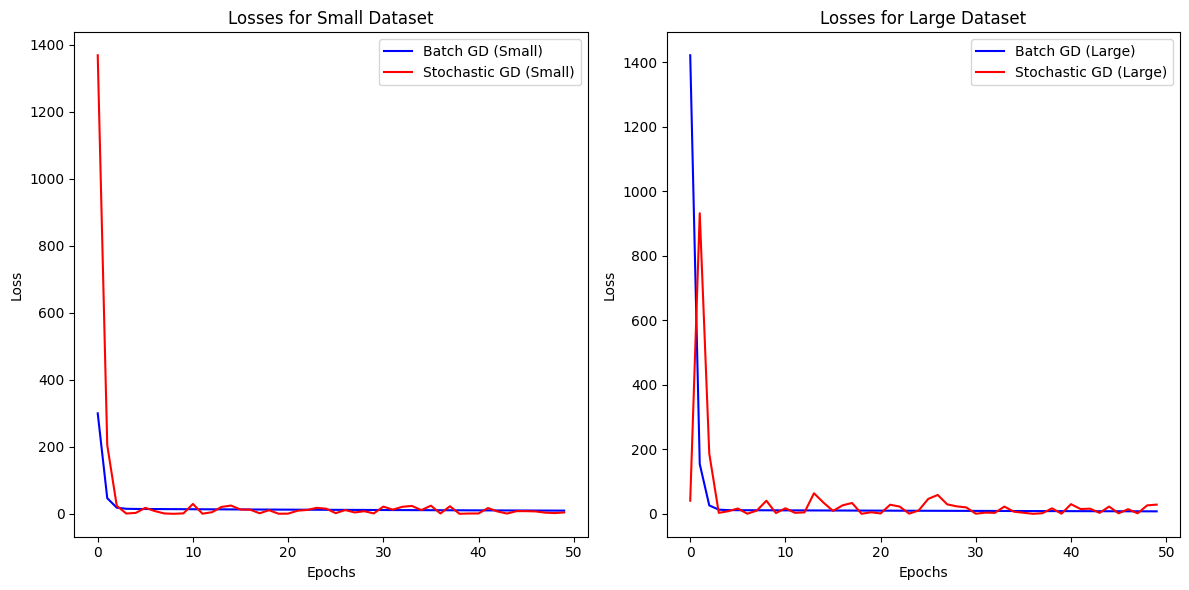

In [23]:
#ploting the losses
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)    
plt.plot(losses_bgd_small, label='Batch GD (Small)', color='blue')
plt.plot(losses_sgd_small, label='Stochastic GD (Small)', color='red')
plt.title('Losses for Small Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses_bgd_large, label='Batch GD (Large)', color='blue')      
plt.plot(losses_sgd_large, label='Stochastic GD (Large)', color='red')
plt.title('Losses for Large Dataset')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
